In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip install librosa

In [ ]:
!git clone https://github.com/saisriteja/sashank_Teja_paperwork.git
!git clone https://github.com/saisriteja/sample_paleru.git

Cloning into 'sashank_Teja_paperwork'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 1112 (delta 20), reused 6 (delta 1), pack-reused 1058
Receiving objects: 100% (1112/1112), 228.75 MiB | 30.18 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Checking out files: 100% (1046/1046), done.
Cloning into 'sample_paleru'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1851 (delta 0), reused 1 (delta 0), pack-reused 1848
Receiving objects: 100% (1851/1851), 413.07 MiB | 32.68 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (1807/1807), done.


In [ ]:
from sashank_Teja_paperwork.codes.arxiv_model import resnet_model
from sashank_Teja_paperwork.codes.audio_agumentations import noise,speed,pitch
from sashank_Teja_paperwork.codes.plotting import spectrogram

Using TensorFlow backend.


In [ ]:
import librosa

In [ ]:
import os
try:
    os.makedirs('/content/data/f')
    os.makedirs('/content/data/nf')
except FileExistsError:
    print('directories already exists')

directories already exists


In [ ]:
import matplotlib
matplotlib.use('Agg') # No pictures displayed 

In [ ]:
class audio:
    def __init__(self,path):
        self.signalData,self.samplingFrequency = librosa.load(path,sr = 22500)

In [ ]:
import pandas as pd
data = pd.read_excel('/content/sashank_Teja_paperwork/Datasets/UCLASS_dataset/UCLASS.xlsx') 
data = data.fillna(False)
data = data[data['Text'] != False]

cols = ['Name','Text','Interjection']
data = data[cols]

files = data['Name'].to_list()
data['Name'] = [i.split('\\')[-1] for i in files]

filler = data[data['Interjection'] != False]
nonfiller = data[data['Interjection'] == False]

In [ ]:
import os
import matplotlib
matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np
from tqdm import tqdm
import numpy as np

In [ ]:
root_dir_files = '/content/sashank_Teja_paperwork/Datasets/UCLASS_dataset/UCLASS'

filler_files = filler['Name'].to_list()
for i in tqdm(filler_files):
    file_path  = os.path.join(root_dir_files,i)
    audio_file = audio(file_path)
    name = i.split('.wav')[0]
    spec_path = '/content/data/f/'+name+'.png'
    spectrogram(audio_file,spec_path,limits = (0,10000))

In [ ]:
nonfiller_files = nonfiller['Name'].to_list()
for i in tqdm(nonfiller_files):
    file_path  = os.path.join(root_dir_files,i)
    audio_file = audio(file_path)
    name = i.split('.wav')[0]
    spec_path = '/content/data/nf/'+name+'.png'
    spectrogram(audio_file,spec_path,limits = (0,10000))


100%|██████████| 598/598 [05:50<00:00,  1.71it/s]


In [ ]:
try:
  os.rmdir('/content/data/.ipynb_checkpoints')
except:
  print('directory is already deleted')

directory is already deleted


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import backend as K
from keras.metrics import categorical_accuracy

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
path = '/content/data/'
train_generator = train_datagen.flow_from_directory(path,
                                                      target_size=(256,256*4),
                                                      batch_size=16,
                                                      class_mode="categorical",color_mode = 'grayscale',shuffle = True,subset='training')
validation_generator = train_datagen.flow_from_directory(path,
                                                      target_size=(256,256*4),
                                                      batch_size=16,
                                                      class_mode="categorical",color_mode = 'grayscale',shuffle = True,subset='validation')

Found 737 images belonging to 2 classes.
Found 183 images belonging to 2 classes.


In [ ]:
import keras
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=5, monitor="val_categorical_accuracy",min_delta=0.0001,verbose = 1),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',verbose = 1,save_best_only=True)
]

#Optimizer Search

In [ ]:
model = resnet_model()
model.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(lr=1e-4),metrics=[categorical_accuracy])
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                              # class_weight=class_weights,
                              callbacks = my_callbacks)

Epoch 1/30
100/100 [==============================] - 193s 2s/step - loss: 0.6913 - categorical_accuracy: 0.5484 - val_loss: 0.6933 - val_categorical_accuracy: 0.6505

Epoch 00001: val_loss did not improve from 0.68138
Epoch 2/30
100/100 [==============================] - 188s 2s/step - loss: 0.6879 - categorical_accuracy: 0.6344 - val_loss: 0.6933 - val_categorical_accuracy: 0.6440

Epoch 00002: val_loss did not improve from 0.68138
Epoch 3/30
100/100 [==============================] - 189s 2s/step - loss: 0.6847 - categorical_accuracy: 0.6452 - val_loss: 0.6804 - val_categorical_accuracy: 0.6558

Epoch 00003: val_loss improved from 0.68138 to 0.68039, saving model to model.03-0.68.h5
Epoch 4/30
100/100 [==============================] - 188s 2s/step - loss: 0.6825 - categorical_accuracy: 0.6469 - val_loss: 0.7004 - val_categorical_accuracy: 0.6440

Epoch 00004: val_loss did not improve from 0.68039
Epoch 5/30
100/100 [==============================] - 189s 2s/step - loss: 0.6774 - ca

In [ ]:
validation_generator = train_datagen.flow_from_directory('/content/data',
                                                      target_size=(256,256*4),
                                                      class_mode="categorical",color_mode = 'grayscale',shuffle = True)

In [ ]:
%time
model = resnet_model()
model.load_weights('/content/model.03-0.68.h5')
predictions = model.predict_generator(validation_generator)

from sklearn import metrics
val_preds = np.argmax(predictions, axis=-1)
val_trues = validation_generator.classes
labels = validation_generator.class_indices.keys()

# print(labels,val_trues,val_preds)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_trues, val_preds)
cnf_matrix

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


array([[  0, 322],
       [  0, 598]])

#Grad cam

In [ ]:
from keras.models import Model
import copy
import warnings
warnings.filterwarnings('ignore')
import cv2
import keras
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from keras.layers import Conv2D, Activation, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input, ResNet50
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
def superimpose(img, cam):
    """superimpose original image and cam heatmap"""
    
    heatmap = cv2.resize(cam, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * .5 + img * .5
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return img, heatmap, superimposed_img

def plot(model, cam_func, img, cls_true):
    
  i = img  
  x = np.expand_dims(img, axis=0)
  # x = preprocess_input(copy.deepcopy(x))

    # for superimpose
  img = np.uint8(img)

    # cam / superimpose
  cls_pred, cam = cam_func(model=model, x=x, layer_name=model.layers[-8].name)
  img, heatmap, superimposed_img = superimpose(i, cam)

  fig, axs = plt.subplots(ncols=3, figsize=(18,5))

  axs[0].imshow(i.squeeze())
  axs[0].set_title('original image')
  axs[0].axis('off')

  axs[1].imshow(heatmap)
  axs[1].set_title('heatmap')
  axs[1].axis('off')

  axs[2].imshow(superimposed_img)
  axs[2].set_title('superimposed image')
  axs[2].axis('off')

  plt.suptitle('True label: ' + class_to_label[np.argmax(cls_true)] + ' / Predicted label : ' + class_to_label[cls_pred])
  plt.tight_layout()
  plt.show()

def grad_cam(model, x, layer_name):
    """Grad-CAM function"""
    
    cls = np.argmax(model.predict(x))
    
    y_c = model.output[0, cls]
    conv_output = model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]

    # Get outputs and grads
    gradient_function = K.function([model.input], [conv_output, grads])
    output, grads_val = gradient_function([x])
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    
    weights = np.mean(grads_val, axis=(0, 1)) # Passing through GlobalAveragePooling

    cam = np.dot(output, weights) # multiply
    cam = np.maximum(cam, 0)      # Passing through ReLU
    cam /= np.max(cam)            # scale 0 to 1.0

    return cls, cam

#SASHANK TASK

1.Non filler, filler

2.Noise embedded

3.Pitch embedded

In [ ]:
from glob import glob
f = glob('/content/data/nf/*.png')

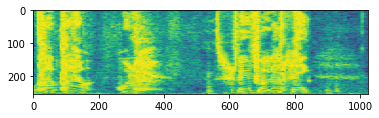

In [ ]:
import cv2
img_spec = cv2.imread(f[0],0)
img_spec = cv2.resize(img_spec,(256*4,256))
plt.imshow(img_spec)

In [ ]:
img_spec=np.expand_dims(img_spec,axis = -1)
img_spec.shape

(256, 1024, 1)

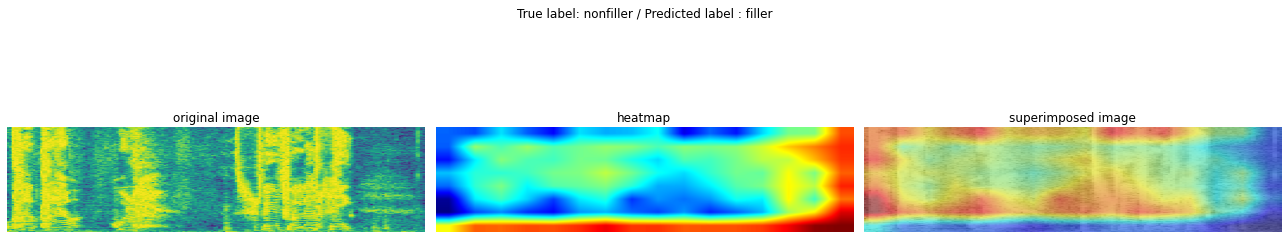

In [ ]:
lab = np.array([ 0.0,1.0])
plot(model=model, cam_func=grad_cam, img=img_spec, cls_true=lab) 

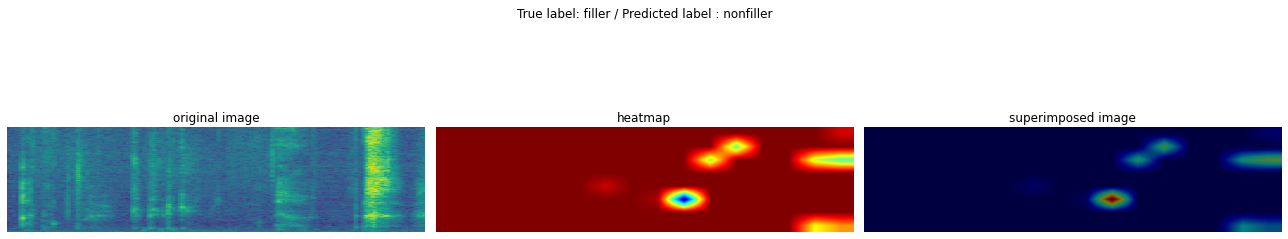

In [ ]:

%matplotlib inline
label_to_class = {
    'filler': 0,
    'nonfiller':1
}
class_to_label = {v: k for k, v in label_to_class.items()}
Images,Classes = next(train_generator)
i = 6
plot(model=model, cam_func=grad_cam, img=Images[i], cls_true=Classes[i]) 

In [ ]:
%time
model.load_weights('/content/model.01-0.69.h5')
predictions = model.predict_generator(validation_generator)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs


In [ ]:
from sklearn import metrics
val_preds = np.argmax(predictions, axis=-1)
val_trues = validation_generator.classes
labels = validation_generator.class_indices.keys()
# print(labels,val_trues,val_preds)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_trues, val_preds)
cnf_matrix

array([[  0, 322],
       [  0, 598]])